# Importing Libraries

In [63]:
import os
import fitz  # PyMuPDF for PDF text extraction
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from torch.optim import AdamW 
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset

In [2]:
# pip install PyMuPDF
# pip install transformers

In [62]:
pip install aequitas

Note: you may need to restart the kernel to use updated packages.Collecting aequitas
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   ------------- -------------------------- 1.0/3.1 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.1 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.1 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.1 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.1 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.1 MB 4.2 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.1 MB 671.3 kB/s eta 0:00:03
   -------------------------- ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Loading the dataset & Exploration

In [3]:
# Loading the extracted data csv file
df = pd.read_csv(r'C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Major_project_SPSU\Main_project\All_resumes\Resumes_data.csv', encoding='latin1')

In [4]:
df.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


In [5]:
df.tail()

,ID,Resume_str,Category
3426,99807073,Computer Skills: Proficient in MS office (Word...,Testing
3427,99807074,Willingness to accept the challenges. Positi...,Testing
3428,99807075,"PERSONAL SKILLS Quick learner, Eagerness to le...",Testing
3429,99807076,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Testing
3430,99807077,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Testing


In [6]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          3431 non-null   int64 
 1   Resume_str  3431 non-null   object
 2   Category    3417 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.5+ KB
None


In [7]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
                 ID
count  3.431000e+03
mean   5.092715e+07
std    3.554681e+07
min    3.547447e+06
25%    2.037413e+07
50%    3.192695e+07
75%    9.980622e+07
max    9.980708e+07


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID             0
Resume_str     0
Category      14
dtype: int64


In [9]:
print("\nUnique Categories:")
print(df['Category'].unique())


Unique Categories:
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' nan 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION' 'Data Science' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [10]:
print("\nResumes Count by Category:")
print(df['Category'].value_counts())


Resumes Count by Category:
Category
HR                           153
INFORMATION-TECHNOLOGY       119
BUSINESS-DEVELOPMENT         118
FITNESS                      117
AVIATION                     117
FINANCE                      116
ENGINEERING                  116
CHEF                         116
ACCOUNTANT                   116
SALES                        115
ADVOCATE                     115
CONSULTANT                   115
BANKING                      115
HEALTHCARE                   113
PUBLIC-RELATIONS             109
CONSTRUCTION                 108
DESIGNER                     106
ARTS                         103
TEACHER                      102
APPAREL                       96
DIGITAL-MEDIA                 95
Java Developer                84
Testing                       70
AGRICULTURE                   63
DevOps Engineer               55
Python Developer              48
Web Designing                 45
Hadoop                        42
Mechanical Engineer           40
ETL De

In [11]:
print("\nExample Resume Text:")
print(df['Resume_str'][0])


Example Resume Text:
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, invento

# Text Preprocessing

In [12]:
# Standardizing:Making the resume text is clean and uniform for Making it easy for further steps

def standardize_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip().lower()  # Convert to lowercase and trim

In [13]:
# Applying standardization to the 'Resume_str' column
df['Standardized_Resume'] = df['Resume_str'].apply(standardize_text)

print(df[['Resume_str', 'Standardized_Resume']].head())

                                          Resume_str  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1           HR SPECIALIST, US HR OPERATIONS      ...   
2           HR DIRECTOR       Summary      Over 2...   
3           HR SPECIALIST       Summary    Dedica...   
4           HR MANAGER         Skill Highlights  ...   

                                 Standardized_Resume  
0  hr administratormarketing associate hr adminis...  
1  hr specialist us hr operations summary versati...  
2  hr director summary over years experience in r...  
3  hr specialist summary dedicated driven and dyn...  
4  hr manager skill highlights hr skills hr depar...  


In [14]:
# Adding a new column for finding the length of resume text after filling the NaN/NoN_string/Invalid values

df['Text_Length'] = df['Standardized_Resume'].apply(len)

In [15]:
print(df.head())

         ID                                         Resume_str Category  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...       HR   
2  33176873           HR DIRECTOR       Summary      Over 2...       HR   
3  27018550           HR SPECIALIST       Summary    Dedica...       HR   
4  17812897           HR MANAGER         Skill Highlights  ...       HR   

                                 Standardized_Resume  Text_Length  
0  hr administratormarketing associate hr adminis...         4767  
1  hr specialist us hr operations summary versati...         4948  
2  hr director summary over years experience in r...         7026  
3  hr specialist summary dedicated driven and dyn...         2545  
4  hr manager skill highlights hr skills hr depar...         8509  


In [16]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                      0
Resume_str              0
Category               14
Standardized_Resume     0
Text_Length             0
dtype: int64


In [17]:
# Missing Category values
print(df[df['Category'].isnull()])

            ID                                         Resume_str Category  \
329   18067556           MASTER DATA MANAGER           Experie...      NaN   
490   19063156           SENIOR MEMBER SERVICE ADVOCATE       ...      NaN   
491   91051945           BUSINESS ADVOCATE BANKER      Cruz   ...      NaN   
540   18090899           SENIOR ADVISOR AND NATIONAL FUNDRAISI...      NaN   
575   37521676           BUSINESS DEVELOPMENT MANAGER         ...      NaN   
680   28670024             HEALTHCARE PROVIDER         Profess...      NaN   
989   45077654           CLAIMS SUBJECT MATTER EXPERT         ...      NaN   
1080  17704246           SALES ASSOCIATE       Summary     Exp...      NaN   
1360  14663897           CHEF       Credentials     National R...      NaN   
1477  15891494           FINANCE OFFICER       Summary    Prof...      NaN   
1780  13264796           DIRECTOR OF ENGINEERING           Exp...      NaN   
1921  26509539           CONSTRUCTION INSTALLER       Summary ..

In [18]:
print("\nResume Text Length Statistics:")
print(df['Text_Length'].describe())


Resume Text Length Statistics:
count     3431.000000
mean      4813.725736
std       2734.009880
min        118.000000
25%       2767.000000
50%       4859.000000
75%       6106.000000
max      30970.000000
Name: Text_Length, dtype: float64


In [19]:
# Checking for duplicate values...
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


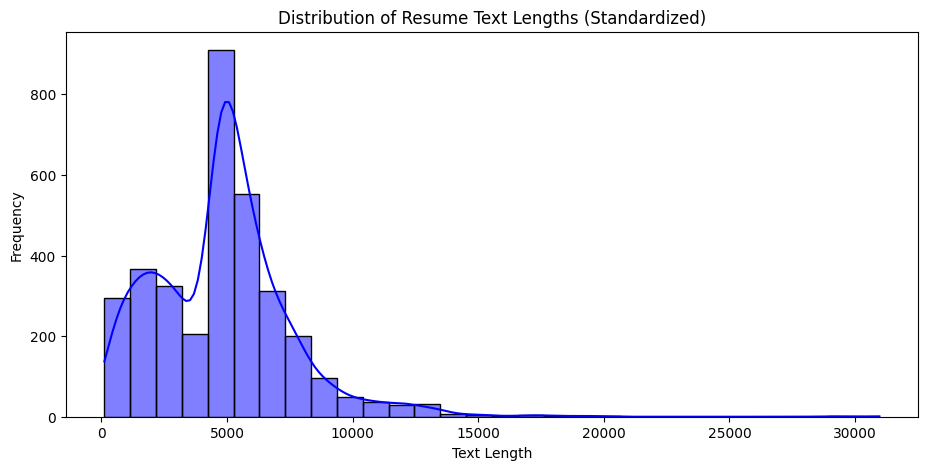

In [20]:
# Visualizing distribution of resume text lengths
plt.figure(figsize=(11, 5))
sns.histplot(df['Text_Length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Resume Text Lengths (Standardized)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

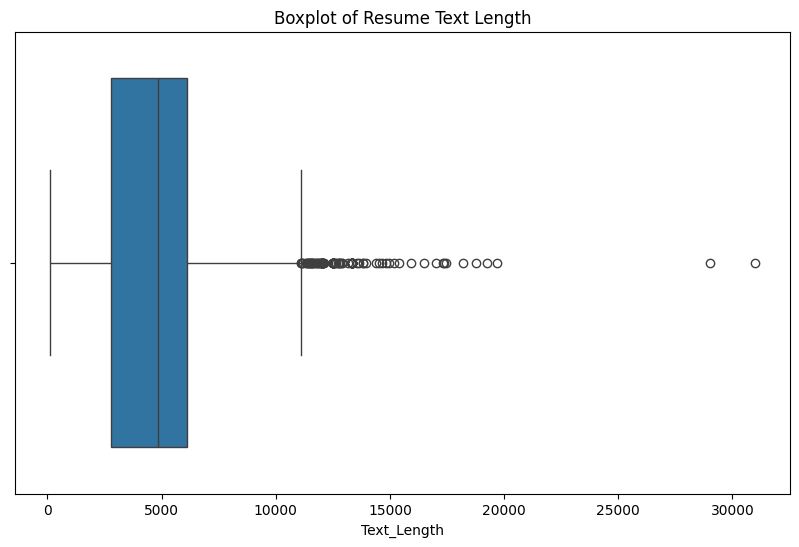

In [21]:
# Visualizing outliers using Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Text_Length')
plt.title("Boxplot of Resume Text Length")
plt.show()

In [22]:
# Sorting the DataFrame by Text_Length in descending order and removing top 5 highest outliers..

sorted_df = df.sort_values(by='Text_Length', ascending=False)
top_5_indices = sorted_df.head(5).index

df = df.drop(index=top_5_indices)

In [23]:
df.head()

,ID,Resume_str,Category,Standardized_Resume,Text_Length
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administratormarketing associate hr adminis...,4767
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...,4948
2,33176873,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in r...,7026
3,27018550,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dyn...,2545
4,17812897,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...,8509


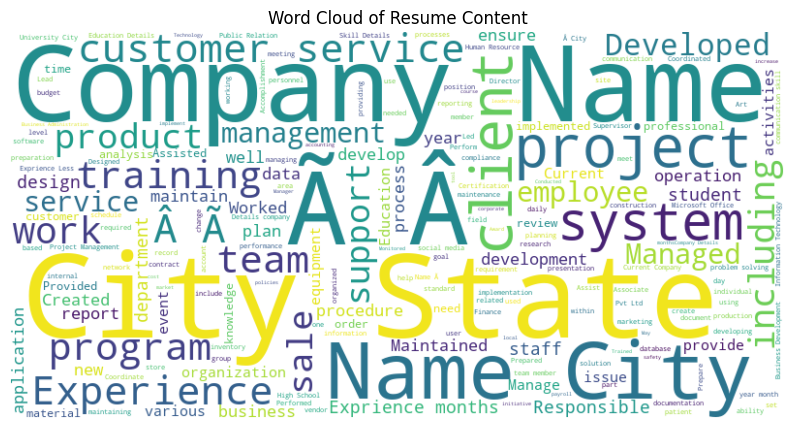

In [24]:
# Word clouds to provide insights into the most frequent words in the resumes...

combined_text = ' '.join(df['Resume_str'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Resume Content")
plt.show()

# Feature Extraction using BERT

In [25]:
# Loading pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Setting the model to evaluation mode to eliminate behaving differently while training
model.eval() 

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [26]:
# Function for extracting embeddings using BERT
def extract_bert_embeddings(text, tokenizer, model, max_len=128):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_tensors="pt"
    )
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Generating embeddings
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state  # Token-level embeddings

    return torch.mean(embeddings, dim=1).squeeze().numpy()

In [27]:
# Tokeninzing the text & Generating embeddings for entire dataset: to extract embeddings.

# df['BERT_Embeddings'] = df['Resume_str'].apply(
#     lambda x: extract_bert_embeddings(x, tokenizer, model)
# )

# # Saving embeddings for later use
# np.save('bert_embeddings.npy', df['BERT_Embeddings'].to_numpy())

# Loading Pre-Saved Bert Embeddings from numpy file

In [28]:
bert_embeddings = np.load('bert_embeddings.npy', allow_pickle=True)

# Assigning embeddings back to the DataFrame
df['BERT_Embeddings'] = list(bert_embeddings)

# Predicting Missing categories

In [29]:
# Separating rows with and without categories
train_data = df.dropna(subset=['Category'])  # Rows with known categories
missing_data = df[df['Category'].isnull()]  # Rows with missing categories

In [30]:
# Preparing data for logistic regression
embedding_train = np.vstack(train_data['BERT_Embeddings'])  # Features for training
y_train = train_data['Category']  # Labels for training
embedding_missing = np.vstack(missing_data['BERT_Embeddings'])  # Features for predicting missing categories

In [31]:
# print(embedding_train.head())
print(y_train.head())

0    HR
1    HR
2    HR
3    HR
4    HR
Name: Category, dtype: object


In [32]:
# Training LogisticRegression model
classifier = LogisticRegression(random_state=42, max_iter=1000)
classifier.fit(embedding_train, y_train)

# Predicting missing categories
predicted_categories = classifier.predict(embedding_missing)

In [34]:
# Updating the original dataframe with predicted categories
df.loc[df['Category'].isnull(), 'Category'] = predicted_categories

In [35]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Category' using LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'].astype(str))

# Verifying encoding and ensuring there are no missing values
print("Category Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("\nMissing Values After Prediction:")
print(df.isnull().sum())

Category Mapping:
{'ACCOUNTANT': np.int64(0), 'ADVOCATE': np.int64(1), 'AGRICULTURE': np.int64(2), 'APPAREL': np.int64(3), 'ARTS': np.int64(4), 'AUTOMOBILE': np.int64(5), 'AVIATION': np.int64(6), 'Advocate': np.int64(7), 'Arts': np.int64(8), 'Automation Testing': np.int64(9), 'BANKING': np.int64(10), 'BPO': np.int64(11), 'BUSINESS-DEVELOPMENT': np.int64(12), 'Blockchain': np.int64(13), 'Business Analyst': np.int64(14), 'CHEF': np.int64(15), 'CONSTRUCTION': np.int64(16), 'CONSULTANT': np.int64(17), 'Civil Engineer': np.int64(18), 'DESIGNER': np.int64(19), 'DIGITAL-MEDIA': np.int64(20), 'Data Science': np.int64(21), 'Database': np.int64(22), 'DevOps Engineer': np.int64(23), 'DotNet Developer': np.int64(24), 'ENGINEERING': np.int64(25), 'ETL Developer': np.int64(26), 'Electrical Engineering': np.int64(27), 'FINANCE': np.int64(28), 'FITNESS': np.int64(29), 'HEALTHCARE': np.int64(30), 'HR': np.int64(31), 'Hadoop': np.int64(32), 'Health and fitness': np.int64(33), 'INFORMATION-TECHNOLOGY': n

In [36]:
# Encoding 'Category' labels directly as int
df['Category'] = df['Category'].astype('category').cat.codes

In [37]:
# Keeping only rows with valid labels
df = df[df['Category'] >= 0] 

In [54]:
df.to_csv(r'C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Major_project_SPSU\Main_project\All_resumes\Resume_2clnd.csv', index=False)

# Train - Test Splitting

In [38]:
# Splitting into training and testing datasets
X = df['Resume_str']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Resetting indices for alignment
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [40]:
# Verifying indices alignment
print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")
print(f"X_train indices: {X_train.index}")
print(f"y_train indices: {y_train.index}")

Training Set Size: 2398
Test Set Size: 1028
X_train indices: RangeIndex(start=0, stop=2398, step=1)
y_train indices: RangeIndex(start=0, stop=2398, step=1)


In [41]:
# Ensuring labels are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(f"y_train type: {y_train.dtypes}, unique values: {y_train.unique()}")
print(f"y_test type: {y_test.dtypes}, unique values: {y_test.unique()}")

y_train type: int64, unique values: [36 14 42  1 17 26 18 35 40  5 19 13 29 20 30 41 46 12 15 11 28  0 31 39
 47 22 33 23 45  6 32 25  3 10  4 16 34 21  2 44  8  9 37 27  7 43 38 24]
y_test type: int64, unique values: [29 15 10 42  1 47  3 16 19 25 23  7 31 21 44 40  4  5  6 30 22 32 27 34
  8 24 17 41 36 13  2 18 28  0 12 26 20 46 45 38 35 14 11 33  9 39 43 37]


In [42]:
print(y_train.head())
print(y_test.head())

0    36
1    14
2    42
3     1
4    17
Name: Category, dtype: int64
0    29
1    15
2    10
3    42
4     1
Name: Category, dtype: int64


# Model Development : Fine tuning BERT model

In [43]:

class ResumeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]  # Using iloc for positional indexing
        label = self.labels.iloc[idx]  # Ensuring label is an integer
        
        # Ensuring text is a valid string before tokenizing
        if not isinstance(text, str):
            raise ValueError(f"Invalid text at index {idx}: {text}")

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)    # Ensuring label is a LongTensor (it means an integer)
        }

    def __len__(self):
        return len(self.texts)

In [44]:
# Preparing Dataset and DataLoader
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_dataset = ResumeDataset(X_train, y_train, tokenizer, max_len=128)
test_dataset = ResumeDataset(X_test, y_test, tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [45]:
# Debugging: Verifying first batch
for batch in train_loader:
    print("First batch sample:")
    print(batch)
    break

First batch sample:
{'input_ids': tensor([[  101,  2204,  4807,  ..., 22425,  2267,   102],
        [  101,  2472,  1997,  ...,  3623,  1999,   102],
        [  101,  5446,  2658,  ...,  2103,  1010,   102],
        ...,
        [  101, 15919,  8425,  ...,  2259,  2103,   102],
        [  101,  2495,  4751,  ...,  1004,  8241,   102],
        [  101,  2495,  4751,  ...,  3231,  2765,   102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8, 12, 28, 11, 46, 19, 14, 21,  8, 31,  6,  5, 39, 19, 35, 32])}


In [46]:
# Initializing BERT Model and Optimizer and Loss function

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['Category'].unique()))
model.train()  # Setting the model to training mode

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)  
loss_fn = torch.nn.CrossEntropyLoss()

# Setting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [47]:
print(X_train.head())

0    * I'm hard working person. * I'm self confiden...
1    Key Skills - Requirement Gathering - Requireme...
2             SALES       Career Overview     Durin...
3             CUSTOMER ADVOCATE           Summary  ...
4             IT CONSULTANT       Career Overview  ...
Name: Resume_str, dtype: object


In [52]:
# Training loop

import os

# Directory to save models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Training loop
epochs = 5 
for epoch in range(epochs):
    model.train()
    total_loss = 0
    print(f"\nEpoch {epoch + 1}/{epochs}")
    
    for batch_idx, batch in enumerate(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:    # Printing progress every 10 batches
            print(f"Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1} completed. Average Loss: {avg_loss:.4f}")

    # Saving model after each epoch
    save_path = os.path.join(save_dir, f"bert_epoch_{epoch + 1}.pth")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss,
    }, save_path)
    print(f"Model saved to {save_path}") 


Epoch 1/5
Batch 0/150 - Loss: 2.4037
Batch 10/150 - Loss: 2.4989
Batch 20/150 - Loss: 2.1091
Batch 30/150 - Loss: 2.5113
Batch 40/150 - Loss: 2.7565
Batch 50/150 - Loss: 2.1449
Batch 60/150 - Loss: 2.2776
Batch 70/150 - Loss: 2.2160
Batch 80/150 - Loss: 2.3614
Batch 90/150 - Loss: 1.7719
Batch 100/150 - Loss: 2.0286
Batch 110/150 - Loss: 1.5367
Batch 120/150 - Loss: 1.1945
Batch 130/150 - Loss: 1.4064
Batch 140/150 - Loss: 1.4377
Epoch 1 completed. Average Loss: 1.9415
Model saved to saved_models\bert_epoch_1.pth

Epoch 2/5
Batch 0/150 - Loss: 0.9048
Batch 10/150 - Loss: 1.5147
Batch 20/150 - Loss: 1.4623
Batch 30/150 - Loss: 1.0267
Batch 40/150 - Loss: 1.3810
Batch 50/150 - Loss: 1.4426
Batch 60/150 - Loss: 1.8818
Batch 70/150 - Loss: 0.7894
Batch 80/150 - Loss: 1.3596
Batch 90/150 - Loss: 1.2297
Batch 100/150 - Loss: 1.2184
Batch 110/150 - Loss: 1.0844
Batch 120/150 - Loss: 0.9557
Batch 130/150 - Loss: 1.1678
Batch 140/150 - Loss: 0.9476
Epoch 2 completed. Average Loss: 1.2636
Model

# BIAS DETECTION

# Adding demographic factors

In [55]:
# Defining proportions based on expected distributions

# Genders
genders = ['Male', 'Female']
gender_probabilities = [0.6, 0.4]  # 60% Male, 40% Female

# Age groups
age_groups = ['<20', '20-30', '30-40', '40-50', '50+']
age_probabilities = [0.1, 0.3, 0.3, 0.2, 0.1]  # Adjusting probabilities based on assumptions

# Races
races = ['Indian', 'White', 'Black', 'Asian', 'Hispanic', 'Indigenous']
race_probabilities = [0.3, 0.2, 0.2, 0.15, 0.1, 0.05] 

# Adding synthetic demographics
df['Gender'] = np.random.choice(genders, size=len(df), p=gender_probabilities)
df['Age_Group'] = np.random.choice(age_groups, size=len(df), p=age_probabilities)
df['Race'] = np.random.choice(races, size=len(df), p=race_probabilities)

  Age_Group        Race
0     30-40      Indian
1     20-30    Hispanic
2     30-40       Black
3     30-40  Indigenous
4     20-30       Black


In [60]:
df.head()

,ID,Resume_str,Category,Standardized_Resume,Text_Length,BERT_Embeddings,Gender,Age_Group,Race
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,31,hr administratormarketing associate hr adminis...,4767,"[-0.33665437, 0.19263944, 0.5298549, 0.0143824...",Female,30-40,Indian
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",31,hr specialist us hr operations summary versati...,4948,"[-0.06824298, 0.26956606, 0.56017184, -0.08988...",Female,20-30,Hispanic
2,33176873,HR DIRECTOR Summary Over 2...,31,hr director summary over years experience in r...,7026,"[-0.3617855, 0.1277222, 0.2181927, -0.06107359...",Male,30-40,Black
3,27018550,HR SPECIALIST Summary Dedica...,31,hr specialist summary dedicated driven and dyn...,2545,"[-0.45055437, 0.2552194, 0.49403635, -0.043443...",Male,30-40,Indigenous
4,17812897,HR MANAGER Skill Highlights ...,31,hr manager skill highlights hr skills hr depar...,8509,"[-0.14836936, 0.2786456, 0.620781, 0.005348648...",Male,20-30,Black


In [68]:
# Making predictions and adding prediction_label to the dataset

In [69]:
# Custom Dataset for Tokenized Data
class ResumeDataset(Dataset):
    def __init__(self, resumes, max_len):
        self.resumes = resumes
        self.max_len = max_len

    def __len__(self):
        return len(self.resumes)

    def __getitem__(self, idx):
        resume = self.resumes[idx]
        encoding = tokenizer.encode_plus(
            resume,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
        }

MAX_LEN = 128  
BATCH_SIZE = 16

# Creating the dataset and DataLoader
dataset = ResumeDataset(df["Resume_str"].tolist(), MAX_LEN)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)

model.eval()

# Making predictions
predicted_labels = []
with torch.no_grad():
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, axis=1)
        predicted_labels.extend(preds.cpu().numpy())

# Adding predictions to the dataset
df["Predicted_Label"] = predicted_labels

In [70]:
# Adding ground truth values of Category field as it is
df["Actual_Label"] = df["Category"]

In [84]:
df.to_csv(r'C:\Users\ASUS\OneDrive - SIR PADAMPAT SINGHANIA UNIVERSITY\Desktop\Major_project_SPSU\Main_project\All_resumes\Resume_3clnd.csv', index=False)

In [74]:
print(df[['Predicted_Label', 'Actual_Label', 'Gender', 'Age_Group', 'Race']].head())

   Predicted_Label  Actual_Label  Gender Age_Group        Race
0               31            31  Female     30-40      Indian
1               31            31  Female     20-30    Hispanic
2               31            31    Male     30-40       Black
3               31            31    Male     30-40  Indigenous
4               31            31    Male     20-30       Black


# STATISTICAL PARITY

In [85]:
# Statistical Parity : Checking whether different groups have similar selection rates.

def calculate_statistical_parity(df, attribute):
    groups = df[attribute].unique()
    rates = {}
    for group in groups:
        group_data = df[df[attribute] == group]
        selection_rate = group_data['Predicted_Label'].mean()
        rates[group] = selection_rate
    return rates

gender_parity = calculate_statistical_parity(df, 'Gender')
print("Statistical Parity for Gender:", gender_parity)

race_parity = calculate_statistical_parity(df, 'Race')
print("Statistical Parity for Race:", race_parity)

age_parity = calculate_statistical_parity(df, 'Age_Group')
print("Statistical Parity for Age Group:", age_parity)

Statistical Parity for Gender: {'Female': np.float64(22.85381818181818), 'Male': np.float64(23.0580204778157)}
Statistical Parity for Race: {'Indian': np.float64(23.280155642023345), 'Hispanic': np.float64(23.44144144144144), 'Black': np.float64(23.06588579795022), 'Indigenous': np.float64(23.80722891566265), 'White': np.float64(22.599402092675636), 'Asian': np.float64(22.217550274223036)}
Statistical Parity for Age Group: {'30-40': np.float64(22.748502994011975), '20-30': np.float64(22.647227533460804), '40-50': np.float64(23.592805755395684), '<20': np.float64(23.470404984423677), '50+': np.float64(22.933701657458563)}


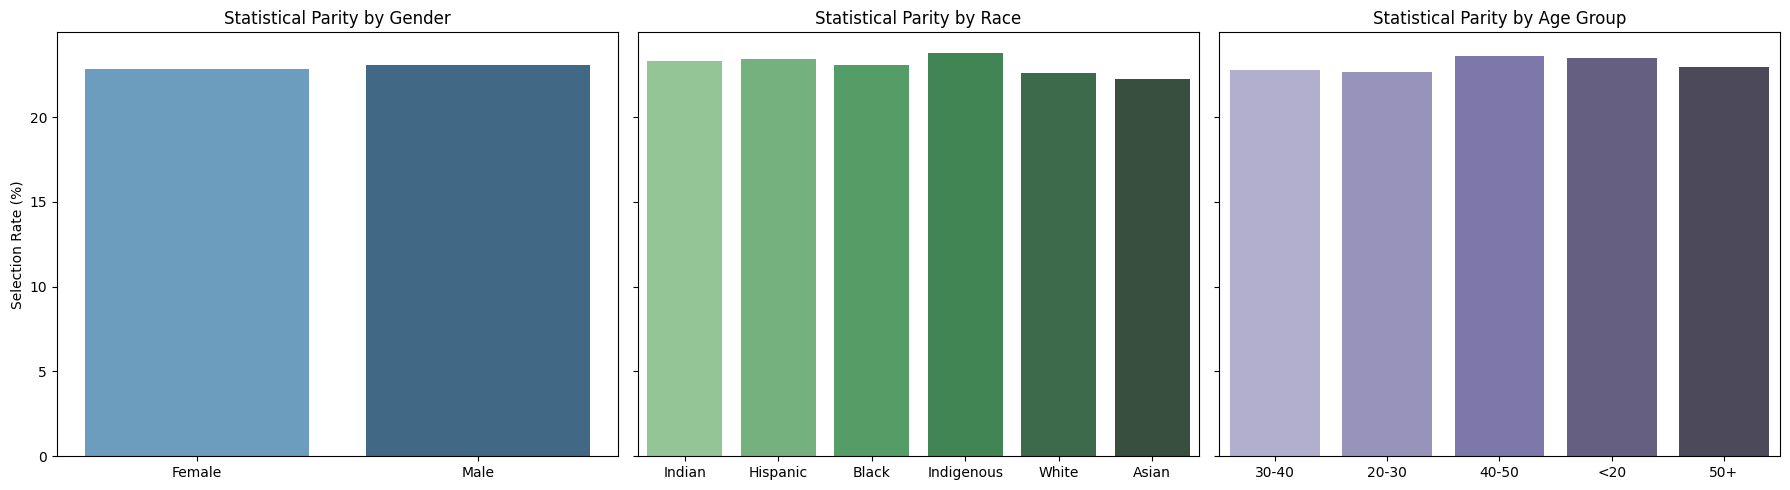

In [92]:
# Plotting Statistical Parity Directly from above Calculated Values

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Gender Parity
sns.barplot(x=list(gender_parity.keys()), y=list(gender_parity.values()), ax=axes[0], palette="Blues_d", hue=list(gender_parity.keys()), dodge=False, legend=False)
axes[0].set_title("Statistical Parity by Gender")
axes[0].set_ylabel("Selection Rate (%)")

# Race Parity
sns.barplot(x=list(race_parity.keys()), y=list(race_parity.values()), ax=axes[1], palette="Greens_d", hue=list(race_parity.keys()), dodge=False, legend=False)
axes[1].set_title("Statistical Parity by Race")

# Age Group Parity
sns.barplot( x=list(age_parity.keys()), y=list(age_parity.values()), ax=axes[2], palette="Purples_d", hue=list(age_parity.keys()), dodge=False, legend=False)
axes[2].set_title("Statistical Parity by Age Group")

plt.tight_layout()
plt.show()

# DISPARATE IMPACT RATIO

In [93]:
# Disparate Impact Ratio : Identifying if any group is disproportionately selected or rejected.

def calculate_disparate_impact(df, attribute, protected_value, unprotected_value):
    protected_data = df[df[attribute] == protected_value]
    unprotected_data = df[df[attribute] == unprotected_value]
    
    protected_rate = protected_data['Predicted_Label'].mean()
    unprotected_rate = unprotected_data['Predicted_Label'].mean()
    
    if unprotected_rate == 0: 
        return None
    
    return protected_rate / unprotected_rate

# Disparate Impact Ratio for Gender (Female vs Male)
disparate_impact_gender = calculate_disparate_impact(df, 'Gender', 'Female', 'Male')
print("Disparate Impact Ratio (Female/Male):", disparate_impact_gender)

# Disparate Impact Ratio for Race (Indian vs Black)
disparate_impact_race = calculate_disparate_impact(df, 'Race', 'Indian', 'Black')
print("Disparate Impact Ratio (Indian/Black):", disparate_impact_race)

Disparate Impact Ratio (Female/Male): 0.991143979762097
Disparate Impact Ratio (Indian/Black): 1.009289469563409


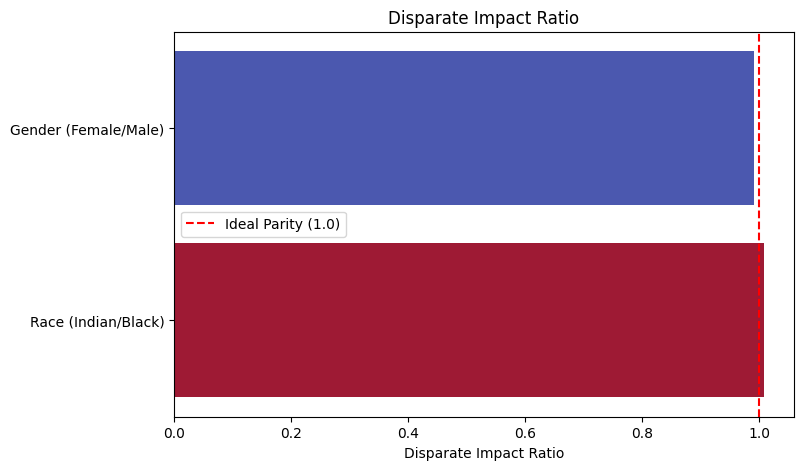

In [95]:
# Disparate Impact Data
disparate_impact_data = {'Gender (Female/Male)': 0.991, 'Race (Indian/Black)': 1.009}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(disparate_impact_data.values()), y=list(disparate_impact_data.keys()), palette="coolwarm", hue=list(disparate_impact_data.values()), legend=False)
plt.title("Disparate Impact Ratio")
plt.xlabel("Disparate Impact Ratio")
plt.axvline(x=1, color='red', linestyle='--', label='Ideal Parity (1.0)')
plt.legend()
plt.show()

# INTERSECTIONAL BIAS

In [96]:
# INTERSECTIONAL BIAS : Explore bias at the intersection of attributes like Gender and Race.

def calculate_intersectional_bias(df, attributes):
    intersection_groups = df.groupby(attributes)['Predicted_Label'].mean()
    return intersection_groups

# Intersectional Bias for Race and Gender
intersectional_bias_race_gender = calculate_intersectional_bias(df, ['Race', 'Gender'])
print("Intersectional Bias (Race + Gender):")
print(intersectional_bias_race_gender)

# Intersectional Bias for Age Group and Race
intersectional_bias_age_race = calculate_intersectional_bias(df, ['Age_Group', 'Race'])
print("Intersectional Bias (Age Group + Race):")
print(intersectional_bias_age_race)

Intersectional Bias (Race + Gender):
Race        Gender
Asian       Female    21.822430
            Male      22.471471
Black       Female    23.169173
            Male      23.000000
Hispanic    Female    24.489933
            Male      22.592391
Indian      Female    22.833333
            Male      23.588816
Indigenous  Female    25.172414
            Male      23.074074
White       Female    21.985075
            Male      23.009975
Name: Predicted_Label, dtype: float64
Intersectional Bias (Age Group + Race):
Age_Group  Race      
20-30      Asian         23.250000
           Black         21.557078
           Hispanic      22.711340
           Indian        22.663664
           Indigenous    25.000000
           White         22.758621
30-40      Asian         21.344156
           Black         24.020619
           Hispanic      23.376238
           Indian        22.853896
           Indigenous    24.772727
           White         21.676617
40-50      Asian         23.338983
     

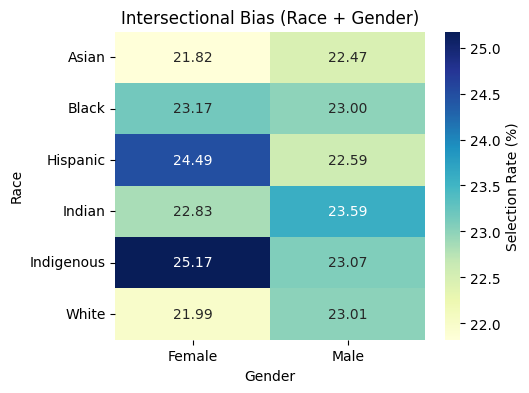

In [110]:
# Visualization for Intersectional Bias (Race + Gender)
# Converting Intersectional Bias Data (Race + Gender) to DataFrame
race_gender_df = intersectional_bias_race_gender.reset_index()
race_gender_df.columns = ['Race', 'Gender', 'Selection Rate']
heatmap_data = race_gender_df.pivot(index="Race", columns="Gender", values="Selection Rate")

# Plotting Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Selection Rate (%)'})
plt.title("Intersectional Bias (Race + Gender)")
plt.ylabel("Race")
plt.xlabel("Gender")
plt.show()

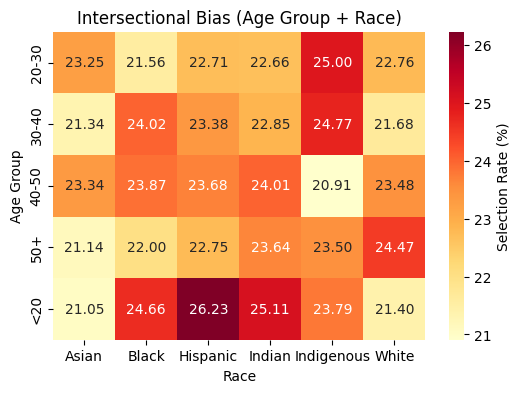

In [112]:
# Visualization for Intersectional Bias (Age Group + Race)
# Converting Intersectional Bias Data (Age Group + Race) to DataFrame

age_race_df = intersectional_bias_age_race.reset_index()
age_race_df.columns = ['Age_Group', 'Race', 'Selection Rate']
heatmap_data_age_race = age_race_df.pivot(index="Age_Group", columns="Race", values="Selection Rate")

# Plotting Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data_age_race, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Selection Rate (%)'})
plt.title("Intersectional Bias (Age Group + Race)")
plt.ylabel("Age Group")
plt.xlabel("Race")
plt.show()

# STATISTICAL TEST Using Chi-Square test

In [114]:
# Statistical Test for BIAS using Chi-Square test : for Statistically validating if the differences in selection rates are significant.

from scipy.stats import chi2_contingency

def chi_square_test(df, attribute, predicted_label_col='Predicted_Label'):
    contingency_table = pd.crosstab(df[attribute], df[predicted_label_col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return chi2, p_value

# Chi-Square test for race
chi2, p_value = chi_square_test(df, 'Race')
print("Chi-Square Test (Race):", f"Chi2={chi2:.2f}, p-value={p_value:.4f}")

# Chi-Square test for Gender
chi2_gender, p_value_gender = chi_square_test(df, 'Gender')
print(f"Chi-Square Test (Gender): Chi2={chi2_gender:.2f}, p-value={p_value_gender:.4f}")

Chi-Square Test (Race): Chi2=217.85, p-value=0.7824
Chi-Square Test (Gender): Chi2=37.11, p-value=0.8488


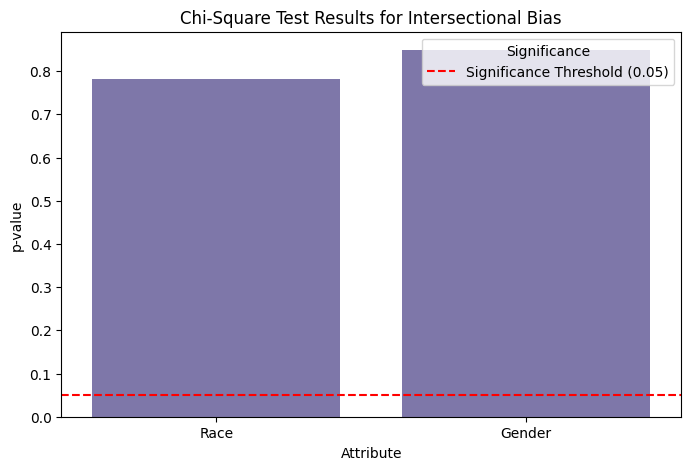

In [119]:
# Using pre-calculated Chi-Square test results
chi2_df = pd.DataFrame({
    'Attribute': ['Race', 'Gender'],
    'Chi2': [217.85, 37.11],
    'p-value': [0.7824, 0.8488]
})

# Adding a column to indicate significance based on p-value
chi2_df['Significant'] = chi2_df['p-value'] < 0.05

# Plotting Barplot for Chi-Square Test Results
plt.figure(figsize=(8, 5))
sns.barplot(x=chi2_df['Attribute'], y=chi2_df['p-value'], palette="Purples_d", hue=chi2_df['Significant'], legend=False)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title("Chi-Square Test Results for Intersectional Bias")
plt.ylabel("p-value")
plt.legend(title='Significance', loc='upper right')
plt.show()